# Lecture 20: Data visualization

_"Data visualization", "chart", "graph", and will be used interchangeably._


[Fix rendering:](https://computing-in-context.afeld.me/notebooks.html#jupyter-book)

In [1]:
import plotly.io as pio

pio.renderers.default = "notebook_connected+plotly_mimetype"

## Start by importing necessary packages


In [2]:
import pandas as pd
import plotly.express as px

<frozen importlib._bootstrap>:491: RuntimeWarning:

The global interpreter lock (GIL) has been enabled to load module 'pandas._libs.pandas_parser', which has not declared that it can run safely without the GIL. To override this behavior and keep the GIL disabled (at your own risk), run with PYTHON_GIL=0 or -Xgil=0.



## Populations


In [3]:
population = pd.read_csv("https://data.cityofnewyork.us/api/views/xi7c-iiu2/rows.csv")
population.head()

,Borough,CD Number,CD Name,1970 Population,1980 Population,1990 Population,2000 Population,2010 Population
0,Bronx,1,"Melrose, Mott Haven, Port Morris",138557,78441,77214,82159,91497
1,Bronx,2,"Hunts Point, Longwood",99493,34399,39443,46824,52246
2,Bronx,3,"Morrisania, Crotona Park East",150636,53635,57162,68574,79762
3,Bronx,4,"Highbridge, Concourse Village",144207,114312,119962,139563,146441
4,Bronx,5,"University Hts., Fordham, Mt. Hope",121807,107995,118435,128313,128200


How can we display this graphically?

Are there other options?

Which is best?

## [Histograms](https://plotly.com/python/histograms/)

What's a histogram?

What makes it different from a bar chart?

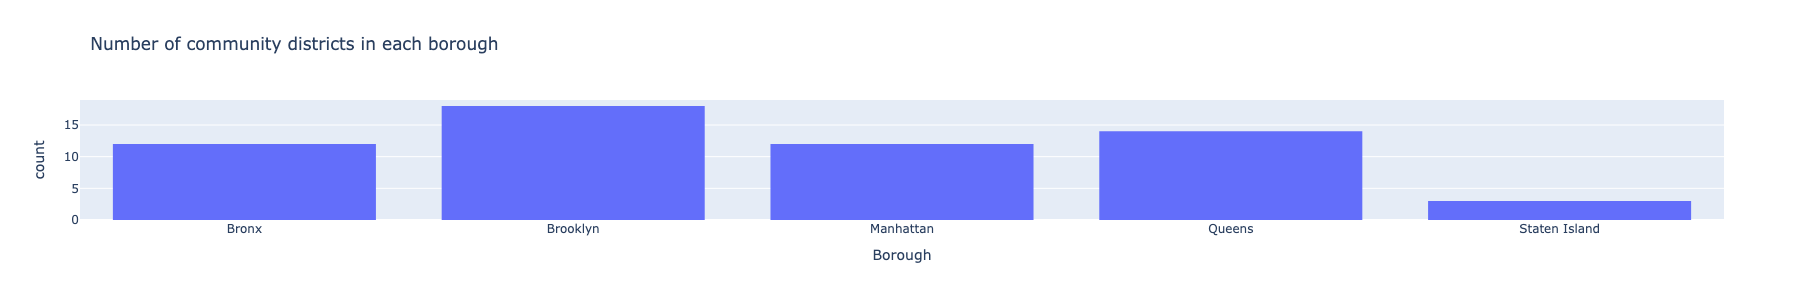

In [4]:
fig = px.histogram(
    population,
    x="Borough",
    title="Number of community districts in each borough",
    height=300,
)
fig.show()

Why isn't there a `y`?

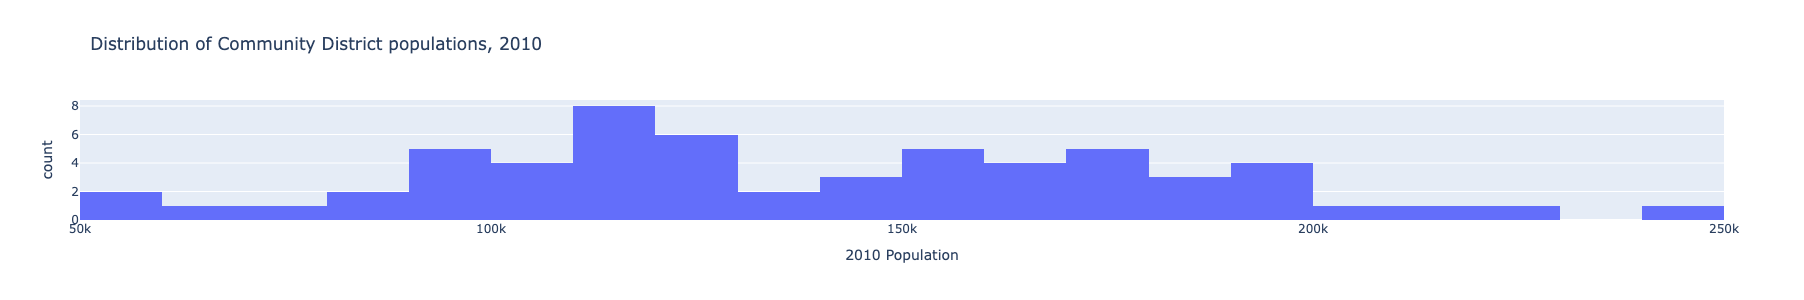

In [5]:
fig = px.histogram(
    population,
    x="2010 Population",
    title="Distribution of Community District populations, 2010",
    height=300,
    nbins=20,
)
fig.show()

What is the `nbins` doing?

## In-class exercise


How would we make a table of number of community districts per borough?


In [6]:
# code here

How would we calculate the average community district population by borough?


In [7]:
# code here

## [Data from where we left off last class](https://computing-in-context.afeld.me/lecture_19.html#join-the-population-data-onto-the-counts-data-after-creating-shared-borocd-unique-id)

Derived dataset containing count of complaints and populations of each community district.


In [8]:
districts = pd.read_csv("https://storage.googleapis.com/python-public-policy2/data/community_district_311.csv.zip")
districts.head()

,Community Board,num_311_requests,boro_cd,Borough,CD Number,CD Name,1970 Population,1980 Population,1990 Population,2000 Population,2010 Population
0,12 MANHATTAN,14110,112,Manhattan,12,"Washington Heights, Inwood",180561,179941,198192,208414,190020
1,05 QUEENS,12487,405,Queens,5,"Ridgewood, Glendale, Maspeth",161022,150142,149126,165911,169190
2,12 QUEENS,12228,412,Queens,12,"Jamaica, St. Albans, Hollis",206639,189383,201293,223602,225919
3,01 BROOKLYN,11863,301,Brooklyn,1,"Williamsburg, Greenpoint",179390,142942,155972,160338,173083
4,03 BROOKLYN,11615,303,Brooklyn,3,Bedford Stuyvesant,203380,133379,138696,143867,152985


Looking at raw volume is probably less useful than density.


## Calculate 311 requests per capita

Divide request count by 2010 population to get requests per capita


In [9]:
districts["requests_per_capita"] = districts["num_311_requests"] / districts["2010 Population"]

districts.head()

,Community Board,num_311_requests,boro_cd,Borough,CD Number,CD Name,1970 Population,1980 Population,1990 Population,2000 Population,2010 Population,requests_per_capita
0,12 MANHATTAN,14110,112,Manhattan,12,"Washington Heights, Inwood",180561,179941,198192,208414,190020,0.074255
1,05 QUEENS,12487,405,Queens,5,"Ridgewood, Glendale, Maspeth",161022,150142,149126,165911,169190,0.073805
2,12 QUEENS,12228,412,Queens,12,"Jamaica, St. Albans, Hollis",206639,189383,201293,223602,225919,0.054126
3,01 BROOKLYN,11863,301,Brooklyn,1,"Williamsburg, Greenpoint",179390,142942,155972,160338,173083,0.068539
4,03 BROOKLYN,11615,303,Brooklyn,3,Bedford Stuyvesant,203380,133379,138696,143867,152985,0.075922


Let's create a simplified new dataframe that only include the columns we care about and in a better order.


In [10]:
columns = [
    "boro_cd",
    "Borough",
    "CD Name",
    "2010 Population",
    "num_311_requests",
    "requests_per_capita",
]
cd_data = districts[columns]

cd_data

,boro_cd,Borough,CD Name,2010 Population,num_311_requests,requests_per_capita
0,112,Manhattan,"Washington Heights, Inwood",190020,14110,0.074255
1,405,Queens,"Ridgewood, Glendale, Maspeth",169190,12487,0.073805
2,412,Queens,"Jamaica, St. Albans, Hollis",225919,12228,0.054126
3,301,Brooklyn,"Williamsburg, Greenpoint",173083,11863,0.068539
4,303,Brooklyn,Bedford Stuyvesant,152985,11615,0.075922
5,501,Staten Island,"Stapleton, Port Richmond",175756,11438,0.065079
6,407,Queens,"Flushing, Bay Terrace",247354,11210,0.045320
7,305,Brooklyn,"East New York, Starrett City",182896,10862,0.059389
8,204,Bronx,"Highbridge, Concourse Village",146441,10628,0.072575
9,401,Queens,"Astoria, Long Island City",191105,10410,0.054473


Let's check out which Community Districts have the highest complaints per capita


In [11]:
cd_data.sort_values("requests_per_capita", ascending=False).head(10)

,boro_cd,Borough,CD Name,2010 Population,num_311_requests,requests_per_capita
38,105,Manhattan,Midtown Business District,51673,6599,0.127707
30,308,Brooklyn,Crown Heights North,96317,7797,0.080951
31,302,Brooklyn,"Brooklyn Heights, Fort Greene",99617,7747,0.077768
32,309,Brooklyn,"Crown Heights South, Wingate",98429,7571,0.076918
21,304,Brooklyn,Bushwick,112634,8639,0.076700
4,303,Brooklyn,Bedford Stuyvesant,152985,11615,0.075922
0,112,Manhattan,"Washington Heights, Inwood",190020,14110,0.074255
22,110,Manhattan,Central Harlem,115723,8592,0.074246
1,405,Queens,"Ridgewood, Glendale, Maspeth",169190,12487,0.073805
8,204,Bronx,"Highbridge, Concourse Village",146441,10628,0.072575


While Inwood (112) had the highest number of complaints, it ranks further down on the list for requests per capita. Midtown may also be an outlier, based on it's low residential population.


In [12]:
# cd_data.to_csv("data/311_community_districts.csv", index=False)

How does the per-capita distribution compare to that of the raw counts?


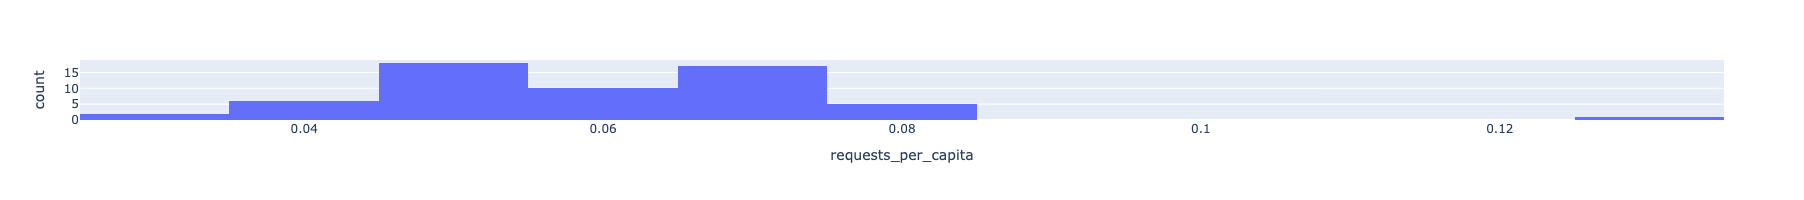

In [13]:
fig = px.histogram(districts, x="requests_per_capita", height=200)
fig.show()

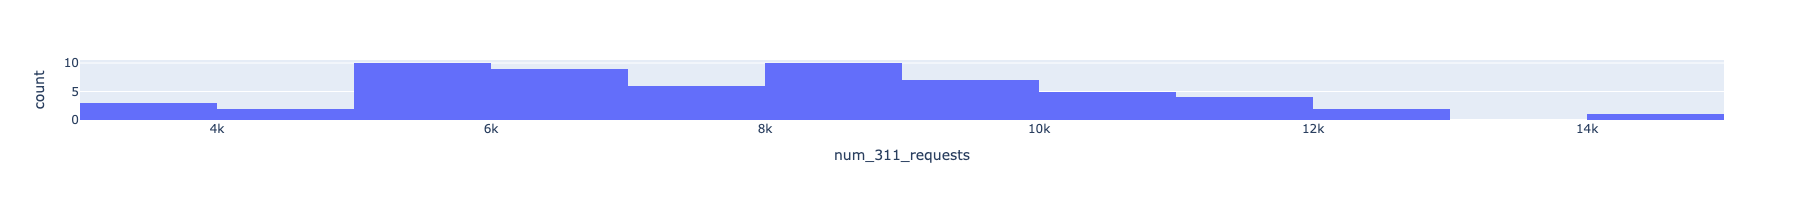

In [14]:
fig = px.histogram(districts, x="num_311_requests", height=200)
fig.show()

Let's [improve the formatting](https://plotly.com/python/figure-labels/) (based on [the `.histogram()` documentation](https://plotly.com/python-api-reference/generated/plotly.express.histogram.html)):


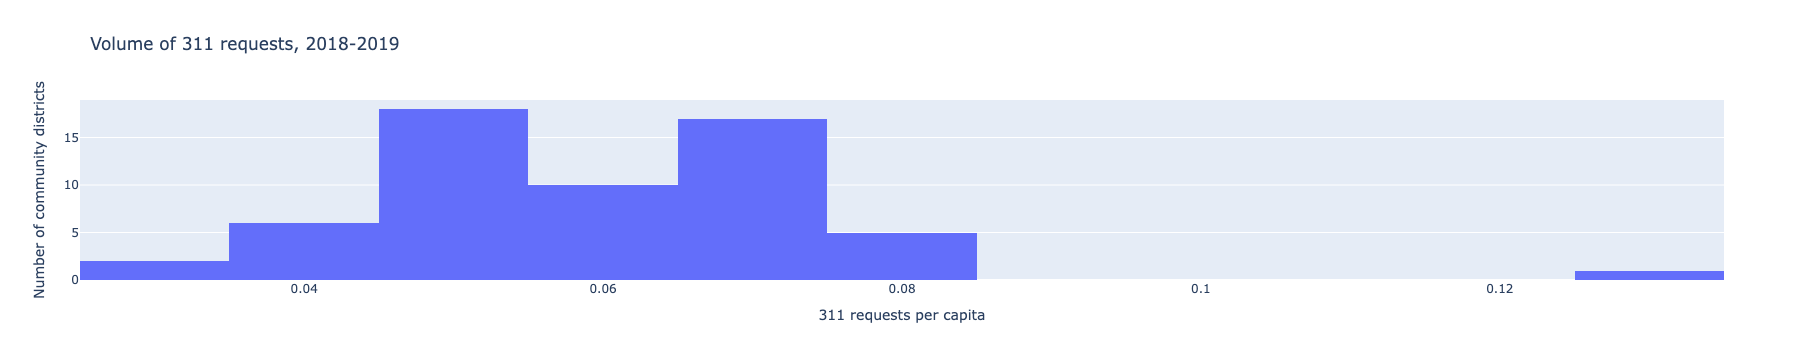

In [15]:
fig = px.histogram(
    districts,
    x="requests_per_capita",
    title="Volume of 311 requests, 2018-2019",
    labels={"requests_per_capita": "311 requests per capita"},
)

# y-axis needs to be done separately, since it's derived
fig.update_layout(yaxis_title_text="Number of community districts")
fig.show()

## Scatterplot


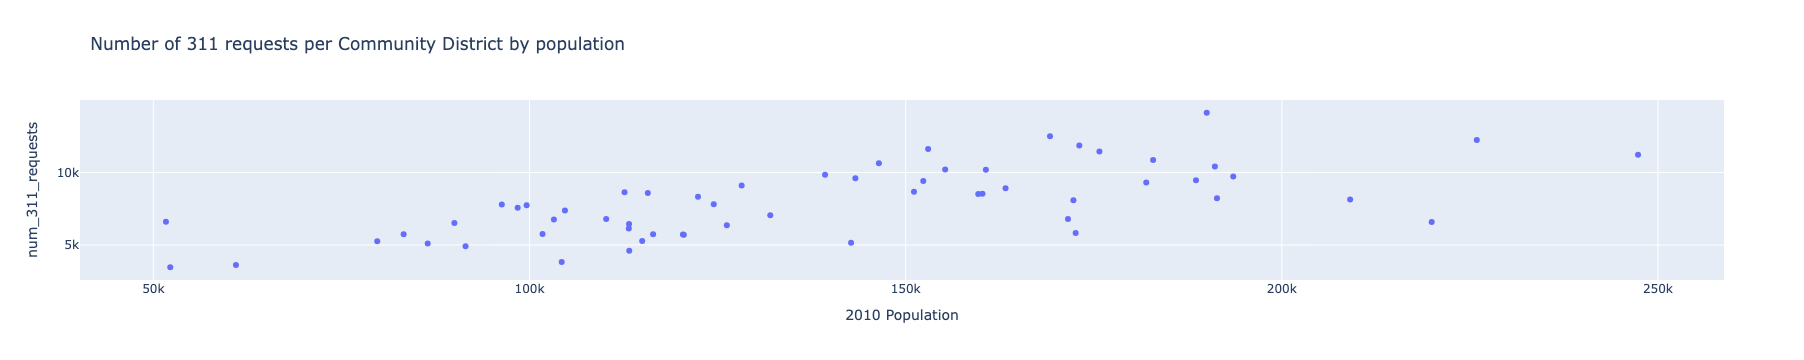

In [16]:
fig = px.scatter(
    districts,
    x="2010 Population",
    y="num_311_requests",
    title="Number of 311 requests per Community District by population",
)

fig.show()

[Add a trendline](https://plotly.com/python/linear-fits/):


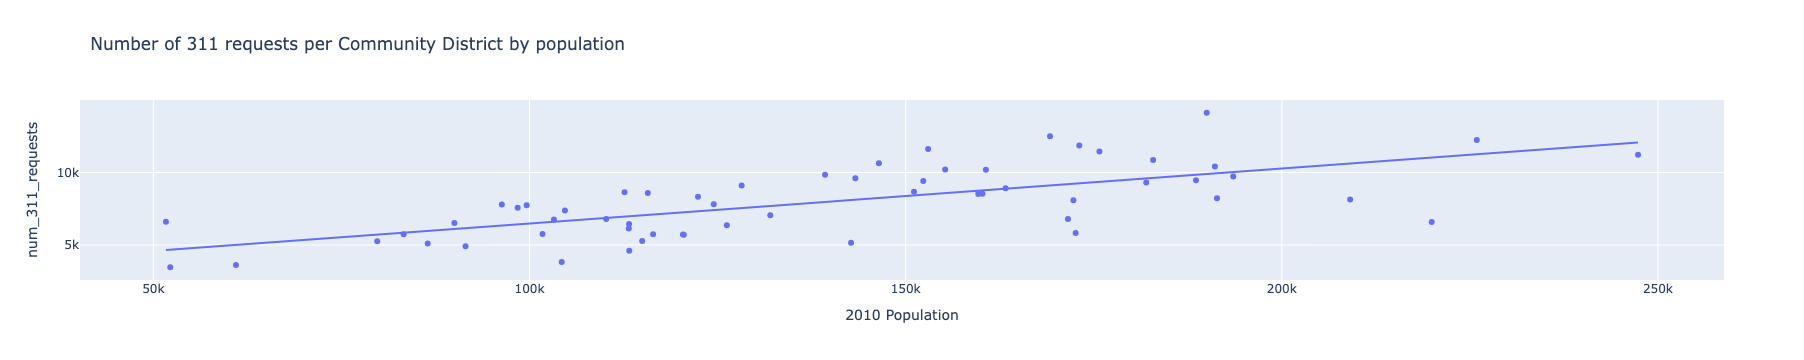

In [17]:
fig = px.scatter(
    districts,
    x="2010 Population",
    y="num_311_requests",
    title="Number of 311 requests per Community District by population",
    trendline="ols",
)

fig.show()

Let's take a look at the statistical summary, via the [`statsmodels`](https://www.statsmodels.org/) package, following [Plotly's example](https://plotly.com/python/linear-fits/#Fitting-multiple-lines-and-retrieving-the-model-parameters):


In [18]:
trend_results = px.get_trendline_results(fig).iloc[0, 0]
trend_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     50.39
Date:                Wed, 12 Nov 2025   Prob (F-statistic):           2.18e-09
Time:                        01:33:39   Log-Likelihood:                -523.81
No. Observations:                  59   AIC:                             1052.
Df Residuals:                      57   BIC:                             1056.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2692.4746    773.994      3.479      0.001    1142.578    4242.371
x1             0.0379      0.005      7.099      0.000       0.027       0.049
==============================================================================
Omnibus:                        0.047   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.977   Jarque-Bera (JB):                0.080
Skew:                          -0.052   Prob(JB):                        0.961
Kurtosis:                       2.853   Cond. No.                     4.88e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.88e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

["In general, the higher the R-squared, the better the model fits your data."](https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit)


## [Lots of types of charts](https://plotly.com/python/plotly-express/#gallery)

Important things are knowing:

- What common chart types are called, so you can search how to make them
- Why you'd pick one versus another

## Chart hygiene

- Always include a title.
- Make sure you label dependent and independent variables (X and Y axes).
- Consider whether you're working with continuous vs. discrete values.
- Less is more.
   - If you're trying to show more than three variables at once (e.g. X axis, Y axis, and color), try simplifying.
